In [1]:
from dariah_topics import preprocessing as pre
from dariah_topics import visualization as visual
from dariah_topics import evaluation

/usr/lib/python3.5/json/encoder.py:198: DeprecationWarning: Interpreting naive datetime as local 2017-04-03 13:20:09.415122. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


## Preprocessing

#### Liste mit Dateinamen erzeugen

In [2]:
path_txt = "corpus_txt"
#path_txt = "grenzbote_plain/*/"
#path_txt = "wiki/"

doclist_txt = pre.create_document_list(path_txt)
assert doclist_txt, "No documents found"
doclist_txt[:5]

['corpus_txt/Lovecraft_AttheMountainofMadness.txt',
 'corpus_txt/Howard_TheDevilinIron.txt',
 'corpus_txt/Poe_ThePurloinedLetter.txt',
 'corpus_txt/Lovecraft_TheShunnedHouse.txt',
 'corpus_txt/Poe_TheMasqueoftheRedDeath.txt']

/usr/lib/python3.5/json/encoder.py:198: DeprecationWarning: Interpreting naive datetime as local 2017-04-03 13:20:10.213345. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


#####  Liste mit Dokumentenlabels erzeugen - (Funktion wird durch Thorsten's generischere Funktion ersetzt)

In [3]:
doc_labels = list(pre.get_labels(doclist_txt))
doc_labels[:5]

['Lovecraft_AttheMountainofMadness',
 'Howard_TheDevilinIron',
 'Poe_ThePurloinedLetter',
 'Lovecraft_TheShunnedHouse',
 'Poe_TheMasqueoftheRedDeath']

/usr/lib/python3.5/json/encoder.py:198: DeprecationWarning: Interpreting naive datetime as local 2017-04-03 13:20:10.221216. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


#### Corpus laden

In [4]:
corpus_txt = pre.read_from_txt(doclist_txt)

/usr/lib/python3.5/json/encoder.py:198: DeprecationWarning: Interpreting naive datetime as local 2017-04-03 13:20:10.233228. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


#### Tokenisieren

In [5]:
doc_tokens = [list(pre.tokenize(txt)) for txt in list(corpus_txt)]

/usr/lib/python3.5/json/encoder.py:198: DeprecationWarning: Interpreting naive datetime as local 2017-04-03 13:20:10.245458. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


#### Create Dictionaries

In [6]:
id_types, doc_ids = pre.create_dictionaries(doc_labels, doc_tokens)

/usr/lib/python3.5/json/encoder.py:198: DeprecationWarning: Interpreting naive datetime as local 2017-04-03 13:20:10.526362. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


#### Sparse BOW Model

In [7]:
sparse_bow = pre.create_mm(doc_labels, doc_tokens, id_types, doc_ids)

/usr/lib/python3.5/json/encoder.py:198: DeprecationWarning: Interpreting naive datetime as local 2017-04-03 13:20:10.588222. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


In [8]:
sparse_bow[:5]

0
doc_id token_id    
1      16384      1
       1          2
       16388      5
       16389     12
       16390      1

/usr/lib/python3.5/json/encoder.py:198: DeprecationWarning: Interpreting naive datetime as local 2017-04-03 13:20:10.960837. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


## Topic Modeling with Gensim

##### Saving Sparse BOW

In [9]:
pre.save_bow_mm(sparse_bow, "gensim_txt")

/usr/lib/python3.5/json/encoder.py:198: DeprecationWarning: Interpreting naive datetime as local 2017-04-03 13:20:10.971550. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


#### Import Market Matrix

In [10]:
from gensim.models import LdaModel
from gensim.corpora import MmCorpus

/usr/lib/python3.5/json/encoder.py:198: DeprecationWarning: Interpreting naive datetime as local 2017-04-03 13:20:11.105772. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


In [11]:
mm = MmCorpus("gensim_txt.mm")

/usr/lib/python3.5/json/encoder.py:198: DeprecationWarning: Interpreting naive datetime as local 2017-04-03 13:20:11.111998. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


In [12]:
doc2id = {value : key for key, value in doc_ids.items()}
type2id = {value : key for key, value in id_types.items()}

/usr/lib/python3.5/json/encoder.py:198: DeprecationWarning: Interpreting naive datetime as local 2017-04-03 13:20:11.122762. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


##### Remove Features

type2id = {value : key for key, value in id_types.items()}
sparse_bow_collapsed = sparse_bow.groupby(sparse_bow.index.get_level_values('token_id')).sum()

sparse_bow_hapax = sparse_bow_collapsed.loc[sparse_bow_collapsed[0] == 1]
hapax = [type2id[key] for key in sparse_bow_hapax.index.get_level_values('token_id')]

len(hapax)

In [13]:
import os.path
basepath = os.path.abspath('.')

with open(os.path.join(basepath, "tutorial_supplementals", "stopwords", "de.txt"), 'r', encoding = 'utf-8') as f: 
    stopword_list = f.read().split('\n')
    
stopword_list = set(stopword_list)

/usr/lib/python3.5/json/encoder.py:198: DeprecationWarning: Interpreting naive datetime as local 2017-04-03 13:20:11.136765. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


In [14]:
hapax_from_remove = pre.find_hapax(sparse_bow, id_types)
stopwords_from_remove = pre.find_stopwords(sparse_bow, id_types, mfw=75)

#features_to_be_removed = set(hapax_from_remove + stopwords_from_remove)
features_to_be_removed = stopwords_from_remove

sparse_bow_short = pre.remove_features(sparse_bow, id_types, features_to_be_removed)

/usr/lib/python3.5/json/encoder.py:198: DeprecationWarning: Interpreting naive datetime as local 2017-04-03 13:20:11.150581. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


In [15]:
len(features_to_be_removed)

75

/usr/lib/python3.5/json/encoder.py:198: DeprecationWarning: Interpreting naive datetime as local 2017-04-03 13:20:11.284929. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


In [16]:
pre.save_bow_mm(sparse_bow_short, "gensim_txt")

/usr/lib/python3.5/json/encoder.py:198: DeprecationWarning: Interpreting naive datetime as local 2017-04-03 13:20:11.290438. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


In [17]:
mm = MmCorpus("gensim_txt.mm")

/usr/lib/python3.5/json/encoder.py:198: DeprecationWarning: Interpreting naive datetime as local 2017-04-03 13:20:11.382937. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


#### Convert sparse_bow to list of (doc, tokens) tuples (like doc2bow)

In [18]:
doc2bow_list = []

for doc in sparse_bow_short.index.groupby(sparse_bow_short.index.get_level_values('doc_id')):
    temp = [(token, count) for token, count in zip(sparse_bow_short.loc[doc].index, sparse_bow_short.loc[doc][0])]
    doc2bow_list.append(temp)

/usr/lib/python3.5/json/encoder.py:198: DeprecationWarning: Interpreting naive datetime as local 2017-04-03 13:20:11.389303. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


In [19]:
len(doc2bow_list)

17

/usr/lib/python3.5/json/encoder.py:198: DeprecationWarning: Interpreting naive datetime as local 2017-04-03 13:20:11.487777. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


In [20]:
#model = LdaModel(corpus=mm, id2word=type2id, num_topics=60, alpha = "symmetric", passes = 10) #import momentan in visual 
# -> da ich mir noch nicht sicher bin, welche Funktionen in das tm_gensim.py sollen
model = LdaModel(corpus=mm, id2word=type2id, num_topics=20, passes = 10, iterations = 20)

/usr/lib/python3.5/json/encoder.py:198: DeprecationWarning: Interpreting naive datetime as local 2017-04-03 13:20:11.494176. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


In [21]:
model.get_document_topics(doc2bow_list[1])

[(0, 0.051011088264455141),
 (1, 0.08336164411505495),
 (4, 0.067701172837515367),
 (5, 0.14275792637147905),
 (7, 0.029693782022128874),
 (8, 0.01305306787978136),
 (9, 0.096321451314110546),
 (15, 0.088160417735347954),
 (16, 0.17865361271494951),
 (18, 0.24671245429484071)]

/usr/lib/python3.5/json/encoder.py:198: DeprecationWarning: Interpreting naive datetime as local 2017-04-03 13:20:53.382983. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


In [22]:
#Anzeige der keywords für topic n
n = 1
topic_nr_x = model.get_topic_terms(n)

topicTerms = [type2id[i[0]] for i in topic_nr_x]
topicTerms

['lawyer',
 'phraseology',
 'five-pound',
 'napping',
 'idler',
 'mews',
 'zabibi',
 'croaking',
 'sturdy',
 'stuck']

/usr/lib/python3.5/json/encoder.py:198: DeprecationWarning: Interpreting naive datetime as local 2017-04-03 13:20:53.392890. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


In [23]:
#Topic probabilities - zum Testen der Funktion
topics = model.show_topics(num_topics = model.num_topics, formatted=False)

num_topics = model.num_topics
topics_df = pre.pd.DataFrame(index = range(num_topics), columns= range(10))

for topic in topics:
    idx = topic[0]
    temp = topic[1]
    topics_df.loc[idx] = temp
        
topics_df

,0,1,2,3,4,5,6,7,8,9
0,"(kitchen-curtains, 0.0049936439921)","(deity, 0.00411213549263)","(indebted, 0.00404191901075)","(count, 0.00391842960968)","(touching, 0.00378844415648)","(belong, 0.00343092106456)","(constellated, 0.00324669486471)","(red-lipped, 0.00296536507308)","(rose, 0.00295693331599)","(cook, 0.00294542508361)"
1,"(lawyer, 0.0055564538832)","(phraseology, 0.00521388562923)","(five-pound, 0.00517961051951)","(napping, 0.00469047224745)","(idler, 0.00466221399393)","(mews, 0.00459587199319)","(zabibi, 0.0043960507045)","(croaking, 0.00432460938695)","(sturdy, 0.00425673970809)","(stuck, 0.00424386063559)"
2,"(pounder, 0.000297634406028)","(cats, 0.00024482934652)","(products, 0.000241613371413)","(mews, 0.00023171808678)","(phraseology, 0.000225796407223)","(touching, 0.000218175847066)","(stinky, 0.000217207512112)","(tourist, 0.000216677271454)","(truism, 0.000214776102229)","(succeed, 0.000213613208371)"
3,"(phraseology, 0.000429642927338)","(stinky, 0.000362981605226)","(succeed, 0.000353099583037)","(cook, 0.000339632626996)","(ivy, 0.000321618561559)","(fluffed, 0.000313658782822)","(lawyer, 0.0003126416168)","(kitchen-curtains, 0.000308972948121)","(tourist, 0.000304633147122)","(touching, 0.000299959716139)"
4,"(every, 0.0121544205339)","(rehoboth, 0.00571816477124)","(touching, 0.00545445719676)","(camping, 0.00431340187164)","(unbarred, 0.00416956163628)","(pasture, 0.0041337680843)","(futurists, 0.00357654269518)","(kitchen-curtains, 0.00350132075915)","(schemes, 0.00331993108674)","(plunging, 0.00326596332533)"
5,"(gorge, 0.00855421654657)","(whimperings, 0.00609551439984)","(truism, 0.00582861948731)","(rumbling, 0.00580383641353)","(pounder, 0.00578716246908)","(weather-beaten, 0.00489372491007)","(jarred, 0.00458104964957)","(repair, 0.0044978438462)","(endeavor, 0.00449145660746)","(vanguard, 0.0042708458771)"
6,"(succeed, 0.00027222692034)","(stinky, 0.000253980290628)","(cook, 0.000239617498542)","(violently, 0.000237434636972)","(phraseology, 0.000237107750238)","(ivy, 0.000230968262153)","(products, 0.000230867684822)","(touching, 0.000223813209123)","(paddington, 0.000222721107659)","(rose, 0.000218934474634)"
7,"(shadows, 0.0109974665476)","(cold-bloodedness, 0.00752701028103)","(nummos, 0.00580265450926)","(counteract, 0.00579194730141)","(huntsman, 0.0057189053516)","(wick, 0.00449945576039)","(contemptuously, 0.00423118767925)","(bed-house, 0.00388875845861)","(fan-wise, 0.00369836608266)","(cyril, 0.00369081932092)"
8,"(mythical, 0.0055002109379)","(eventuality, 0.00485009718078)","(indispensable, 0.00452289481478)","(kitchen-curtains, 0.00407632584015)","(lounging, 0.00320591442547)","(cook, 0.00312835468807)","(leverage, 0.00290042735709)","(rides, 0.00282421073884)","(truism, 0.00250411538408)","(ensued, 0.00249472709769)"
9,"(kitchen-curtains, 0.00971618566685)","(cook, 0.00606655295639)","(stinky, 0.00563864212014)","(polygamy, 0.00480893845467)","(confined, 0.00479574220282)","(volumes, 0.00477240917141)","(leverage, 0.00432801827963)","(paddington, 0.00422521035414)","(wagon, 0.004115242613)","(protect, 0.00403064992463)"


/usr/lib/python3.5/json/encoder.py:198: DeprecationWarning: Interpreting naive datetime as local 2017-04-03 13:20:53.402191. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


In [24]:
topics_df = pre.gensim2dataframe(model)
topics_df

,0,1,2,3,4,5,6,7,8,9
0,"(kitchen-curtains, 0.0049936439921)","(deity, 0.00411213549263)","(indebted, 0.00404191901075)","(count, 0.00391842960968)","(touching, 0.00378844415648)","(belong, 0.00343092106456)","(constellated, 0.00324669486471)","(red-lipped, 0.00296536507308)","(rose, 0.00295693331599)","(cook, 0.00294542508361)"
1,"(lawyer, 0.0055564538832)","(phraseology, 0.00521388562923)","(five-pound, 0.00517961051951)","(napping, 0.00469047224745)","(idler, 0.00466221399393)","(mews, 0.00459587199319)","(zabibi, 0.0043960507045)","(croaking, 0.00432460938695)","(sturdy, 0.00425673970809)","(stuck, 0.00424386063559)"
2,"(pounder, 0.000297634406028)","(cats, 0.00024482934652)","(products, 0.000241613371413)","(mews, 0.00023171808678)","(phraseology, 0.000225796407223)","(touching, 0.000218175847066)","(stinky, 0.000217207512112)","(tourist, 0.000216677271454)","(truism, 0.000214776102229)","(succeed, 0.000213613208371)"
3,"(phraseology, 0.000429642927338)","(stinky, 0.000362981605226)","(succeed, 0.000353099583037)","(cook, 0.000339632626996)","(ivy, 0.000321618561559)","(fluffed, 0.000313658782822)","(lawyer, 0.0003126416168)","(kitchen-curtains, 0.000308972948121)","(tourist, 0.000304633147122)","(touching, 0.000299959716139)"
4,"(every, 0.0121544205339)","(rehoboth, 0.00571816477124)","(touching, 0.00545445719676)","(camping, 0.00431340187164)","(unbarred, 0.00416956163628)","(pasture, 0.0041337680843)","(futurists, 0.00357654269518)","(kitchen-curtains, 0.00350132075915)","(schemes, 0.00331993108674)","(plunging, 0.00326596332533)"
5,"(gorge, 0.00855421654657)","(whimperings, 0.00609551439984)","(truism, 0.00582861948731)","(rumbling, 0.00580383641353)","(pounder, 0.00578716246908)","(weather-beaten, 0.00489372491007)","(jarred, 0.00458104964957)","(repair, 0.0044978438462)","(endeavor, 0.00449145660746)","(vanguard, 0.0042708458771)"
6,"(succeed, 0.00027222692034)","(stinky, 0.000253980290628)","(cook, 0.000239617498542)","(violently, 0.000237434636972)","(phraseology, 0.000237107750238)","(ivy, 0.000230968262153)","(products, 0.000230867684822)","(touching, 0.000223813209123)","(paddington, 0.000222721107659)","(rose, 0.000218934474634)"
7,"(shadows, 0.0109974665476)","(cold-bloodedness, 0.00752701028103)","(nummos, 0.00580265450926)","(counteract, 0.00579194730141)","(huntsman, 0.0057189053516)","(wick, 0.00449945576039)","(contemptuously, 0.00423118767925)","(bed-house, 0.00388875845861)","(fan-wise, 0.00369836608266)","(cyril, 0.00369081932092)"
8,"(mythical, 0.0055002109379)","(eventuality, 0.00485009718078)","(indispensable, 0.00452289481478)","(kitchen-curtains, 0.00407632584015)","(lounging, 0.00320591442547)","(cook, 0.00312835468807)","(leverage, 0.00290042735709)","(rides, 0.00282421073884)","(truism, 0.00250411538408)","(ensued, 0.00249472709769)"
9,"(kitchen-curtains, 0.00971618566685)","(cook, 0.00606655295639)","(stinky, 0.00563864212014)","(polygamy, 0.00480893845467)","(confined, 0.00479574220282)","(volumes, 0.00477240917141)","(leverage, 0.00432801827963)","(paddington, 0.00422521035414)","(wagon, 0.004115242613)","(protect, 0.00403064992463)"


/usr/lib/python3.5/json/encoder.py:198: DeprecationWarning: Interpreting naive datetime as local 2017-04-03 13:20:53.469834. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


In [25]:
doc_topic = topics_df.T
doc_topic

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,"(kitchen-curtains, 0.0049936439921)","(lawyer, 0.0055564538832)","(pounder, 0.000297634406028)","(phraseology, 0.000429642927338)","(every, 0.0121544205339)","(gorge, 0.00855421654657)","(succeed, 0.00027222692034)","(shadows, 0.0109974665476)","(mythical, 0.0055002109379)","(kitchen-curtains, 0.00971618566685)","(jotted, 0.00193640038552)","(truism, 0.000350299545523)","(ensued, 0.000311417827796)","(associated, 0.000552156194552)","(touching, 0.000308916000195)","(graveyards, 0.00675038000769)","(associated, 0.00902764474616)","(tighter, 0.00759670423896)","(stinky, 0.00379904041655)","(stinky, 0.000296578406571)"
1,"(deity, 0.00411213549263)","(phraseology, 0.00521388562923)","(cats, 0.00024482934652)","(stinky, 0.000362981605226)","(rehoboth, 0.00571816477124)","(whimperings, 0.00609551439984)","(stinky, 0.000253980290628)","(cold-bloodedness, 0.00752701028103)","(eventuality, 0.00485009718078)","(cook, 0.00606655295639)","(near-squeak, 0.00154367290871)","(products, 0.000337659909267)","(contemptuously, 0.000272642550321)","(phraseology, 0.00042607101)","(succeed, 0.000299935481515)","(poisonous, 0.00480906211364)","(lawyer, 0.00659636555774)","(lawyer, 0.00751326061163)","(scales, 0.00315340471484)","(truism, 0.000296191074111)"
2,"(indebted, 0.00404191901075)","(five-pound, 0.00517961051951)","(products, 0.000241613371413)","(succeed, 0.000353099583037)","(touching, 0.00545445719676)","(truism, 0.00582861948731)","(cook, 0.000239617498542)","(nummos, 0.00580265450926)","(indispensable, 0.00452289481478)","(stinky, 0.00563864212014)","(three-fourths, 0.00151996870172)","(succeed, 0.000315489978579)","(tourist, 0.000267267073362)","(fluffed, 0.000400441149876)","(cook, 0.000292707721146)","(ensued, 0.00453136924118)","(stump, 0.00453008430793)","(communications, 0.00577718201413)","(introductions, 0.0030805298553)","(violently, 0.000290649670488)"
3,"(count, 0.00391842960968)","(napping, 0.00469047224745)","(mews, 0.00023171808678)","(cook, 0.000339632626996)","(camping, 0.00431340187164)","(rumbling, 0.00580383641353)","(violently, 0.000237434636972)","(counteract, 0.00579194730141)","(kitchen-curtains, 0.00407632584015)","(polygamy, 0.00480893845467)","(uncouth, 0.00150537878679)","(rehoboth, 0.000306482507624)","(stinky, 0.000264799230498)","(succeed, 0.000399462076906)","(ivy, 0.00029013621845)","(huntsman, 0.00441519091237)","(heavily-laden, 0.00399771781346)","(eloquent, 0.00552806290306)","(decoration, 0.00307899995996)","(contemptuously, 0.000260989306835)"
4,"(touching, 0.00378844415648)","(idler, 0.00466221399393)","(phraseology, 0.000225796407223)","(ivy, 0.000321618561559)","(unbarred, 0.00416956163628)","(pounder, 0.00578716246908)","(phraseology, 0.000237107750238)","(huntsman, 0.0057189053516)","(lounging, 0.00320591442547)","(confined, 0.00479574220282)","(pebble, 0.00145184476272)","(lawyer, 0.000297773648823)","(stump, 0.000257133671853)","(idler, 0.000384132355256)","(tourist, 0.000284900203373)","(significance, 0.00424689363865)","(contemptuously, 0.00384189739825)","(sorrow, 0.00469551664142)","(touching, 0.00304877570179)","(kitchen-curtains, 0.000257162612833)"
5,"(belong, 0.00343092106456)","(mews, 0.00459587199319)","(touching, 0.000218175847066)","(fluffed, 0.000313658782822)","(pasture, 0.0041337680843)","(weather-beaten, 0.00489372491007)","(ivy, 0.000230968262153)","(wick, 0.00449945576039)","(cook, 0.00312835468807)","(volumes, 0.00477240917141)","(ajar, 0.00126108266026)","(croaking, 0.000289140424726)","(truism, 0.000248845440394)","(lawyer, 0.0003838500743)","(products, 0.000279923190904)","(fluffed, 0.00412564105136)","(phraseology, 0.00374229755741)","(sunol, 0.00469141924687)","(kitchen-curtains, 0.00295908829441)","(phraseology, 0.000251937005576)"
6,"(constellated, 0.00324669486471)","(zabibi, 0.0043960507045)","(stinky, 0.000217207512112)","(lawyer, 0.0003126416168)","(futurists, 0.00357654269518)","(jarred, 0.00458104964957)","(p

/usr/lib/python3.5/json/encoder.py:198: DeprecationWarning: Interpreting naive datetime as local 2017-04-03 13:20:53.537081. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


## Visualisierung 

In [26]:
'''lda_model = 'out_easy/corpus.lda'
corpus = 'out_easy/corpus.mm'
dictionary = 'out_easy/corpus.dict'
doc_labels = 'out_easy/corpus_doclabels.txt'
interactive  = False

vis = visual.Visualization(lda_model, corpus, dictionary, doc_labels, interactive)'''

"lda_model = 'out_easy/corpus.lda'\ncorpus = 'out_easy/corpus.mm'\ndictionary = 'out_easy/corpus.dict'\ndoc_labels = 'out_easy/corpus_doclabels.txt'\ninteractive  = False\n\nvis = visual.Visualization(lda_model, corpus, dictionary, doc_labels, interactive)"

/usr/lib/python3.5/json/encoder.py:198: DeprecationWarning: Interpreting naive datetime as local 2017-04-03 13:20:53.600059. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


##### Create a document-topic matrix (that is a pandas data frame actually)

In [27]:
doc_topic = visual.create_doc_topic(mm, model, doc_labels)

/usr/lib/python3.5/json/encoder.py:198: DeprecationWarning: Interpreting naive datetime as local 2017-04-03 13:20:53.611348. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


##### Visualize document-topic matrix

<module 'matplotlib.pyplot' from '/home/sina/.local/lib/python3.5/site-packages/matplotlib/pyplot.py'>

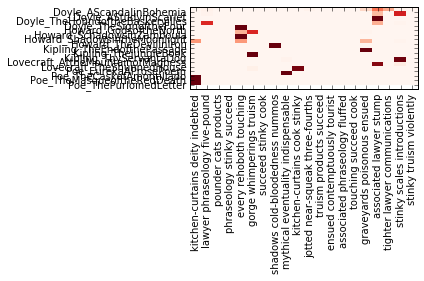

/usr/lib/python3.5/json/encoder.py:198: DeprecationWarning: Interpreting naive datetime as local 2017-04-03 13:20:53.856838. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


In [28]:
%matplotlib inline
visual.doc_topic_heatmap(doc_topic)

##### Visualize topic distribution in a single document

<module 'matplotlib.pyplot' from '/home/sina/.local/lib/python3.5/site-packages/matplotlib/pyplot.py'>

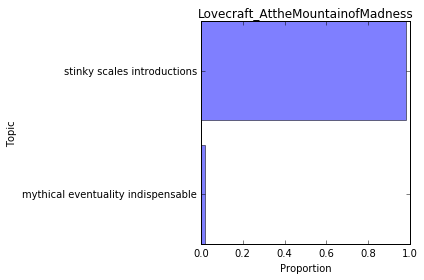

/usr/lib/python3.5/json/encoder.py:198: DeprecationWarning: Interpreting naive datetime as local 2017-04-03 13:20:54.139344. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


In [29]:
visual.plot_doc_topics(doc_topic, 0)

![success](http://cdn2.hubspot.net/hub/128506/file-446943132-jpg/images/computer_woman_success.jpg)